In [1]:
import pandas as pd
import numpy as np
import os
import folium

### Total Cases and Fatalities by country as of March 31st('TotalNumberbyCountryLatest.csv')

In [31]:
dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')
dftotal = dftotal.nlargest(10, 'Fatalities')
dftotal

,Country_Region,AccumulatedCases,Fatalities
81,Italy,105792.0,12428.0
147,Spain,95923.0,8464.0
162,US,188018.0,3870.0
58,France,52827.0,3532.0
33,China,82279.0,3309.0
77,Iran,44605.0,2898.0
166,United Kingdom,25471.0,1793.0
114,Netherlands,12667.0,1040.0
62,Germany,71808.0,775.0
16,Belgium,12775.0,705.0


## Data Visualization

## Scatter plot of Accumulated Cases and Fatalities

In [32]:
range(1,15)l_dftotal = dftotal.values.tolist()

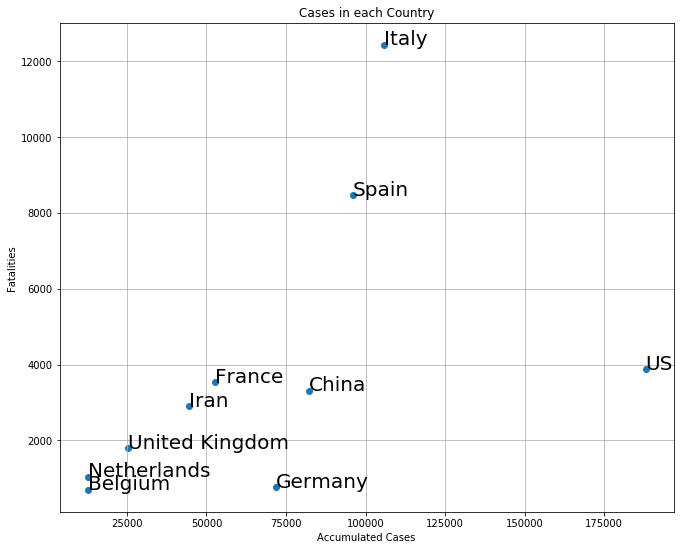

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(11, 9)

plt.xlabel("Accumulated Cases")
plt.ylabel("Fatalities")
plt.title("Cases in each Country")

together = dftotal.values.tolist()



for x,y,z in l_dftotal:
       plt.annotate(str(x), xy=(y, z), size=20)

plt.grid(True)
# 散布図を描画

x = dftotal.AccumulatedCases
y = dftotal.Fatalities

plt.scatter(x, y)

### Timeseries Changes in Italy

In [77]:
dfitaly = pd.read_csv('train.csv').query('Country_Region == "Italy"').drop(['Province_State','Country_Region', 'Id'], axis = 1)
dfitaly

,Date,ConfirmedCases,Fatalities
9800,2020-01-22,0.0,0.0
9801,2020-01-23,0.0,0.0
9802,2020-01-24,0.0,0.0
9803,2020-01-25,0.0,0.0
9804,2020-01-26,0.0,0.0
...,...,...,...
9865,2020-03-27,86498.0,9134.0
9866,2020-03-28,92472.0,10023.0
9867,2020-03-29,97689.0,10779.0
9868,2020-03-30,101739.0,11591.0


In [90]:
dfus = pd.read_csv('train.csv').query('Country_Region == "US"').groupby('Date').sum().drop('Id', axis = 1)
dfus

,ConfirmedCases,Fatalities
Date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2020-03-27,101580.0,1578.0
2020-03-28,121326.0,2023.0
2020-03-29,140734.0,2464.0


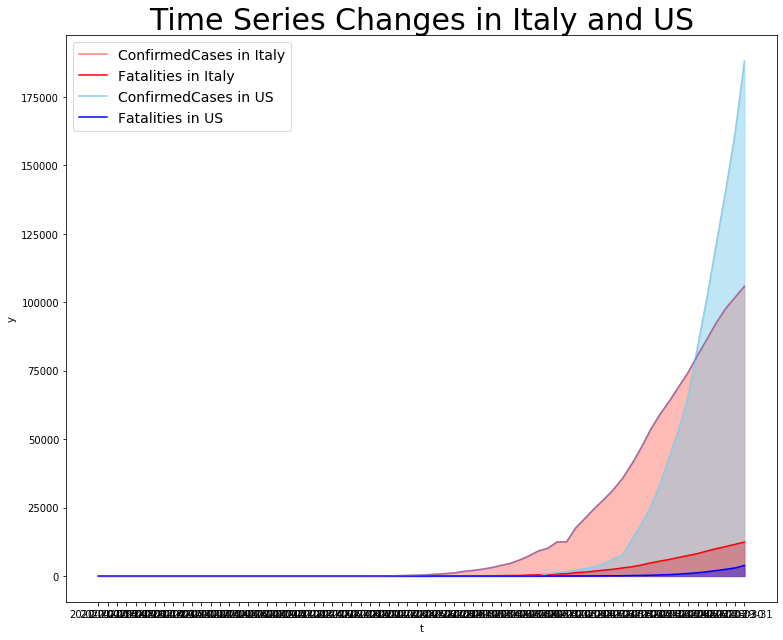

In [99]:
# done
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

t = dfitaly.Date
y1 = dfitaly.ConfirmedCases
y2 = dfitaly.Fatalities
y3 = dfus.ConfirmedCases
y4 = dfus.Fatalities

c1,c2, c3, c4 = "salmon","red", "skyblue", "blue"  # 各プロットの色
l1,l2, l3, l4 = "ConfirmedCases in Italy","Fatalities in Italy", "ConfirmedCases in US","Fatalities in US"  # 各ラベル

ax.set_xlabel('t')  # x軸ラベル
ax.set_ylabel('y')  # y軸ラベル
ax.set_title(r'Time Series Changes in Italy and US', size = 30) # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
#ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(t, y1, color=c1, label=l1)
ax.plot(t, y2, color=c2, label=l2)
ax.plot(t, y3, color=c3, label=l3)
ax.plot(t, y4, color=c4, label=l4)

# Change the color and its transparency
plt.fill_between( t, y1, color="salmon", alpha=0.4)
plt.fill_between( t, y2, color="red", alpha=0.4)
plt.fill_between( t, y3, color="skyblue", alpha=0.4)
plt.fill_between( t, y4, color="blue", alpha=0.4)


# Same, but add a stronger line on top (edge)
plt.fill_between( t, y1, color="salmon", alpha=0.2)
plt.fill_between( t, y2, color="red", alpha=0.2)
plt.fill_between( t, y3, color="skyblue", alpha=0.2)
plt.fill_between( t, y4, color="blue", alpha=0.2)

plt.plot(x, y, color="Slateblue", alpha=0.6)

ax.legend(loc=0, fontsize=14)    # 凡例
fig.tight_layout()  # レイアウトの設定
# plt.savefig('hoge.png') # 画像の保存
plt.show()

--end of this notebook--